# Coursework 2: Clinical image classification

In this coursework, we will work on a clinical imaging dataset. The dataset comes from [ISIC (International Skin Imaging Collaboration) 2016 Challenge](https://challenge.kitware.com/#challenge/560d7856cad3a57cfde481ba). It consists of 900 skin lesion images, categorised into two classes: malignant (melanoma) and benign, as shown here.

![](melanoma_vs_benign.jpg)

To faciliate this coursework, we have pre-processed the images for you, including resizing the original images to a standard size of 32 by 32, splitting into a training set and a test set, so you simply need to focus on the visualisation and classification work. Your task here is to read the imaging data and train a model that classifies between benign and malignant images.

Hint: This coursework is similar to the hand digit classification problem you have just learnt at class. It is a transition from data management to data analysis. You will use a machine learning library, sklearn, and we have provided guidance in this coursework. We will assess the proper implementation of the whole pipeline, but not the classification accuracy. Just have fun!

In the next term, you will learn more about machine learning, what each of the model mentioned here does and how to improve the classification performance.

In [3]:
# Load the libraries (provided)
import os
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import neighbors, ensemble, svm, metrics

## 1. Load and visualise data.

#### 1.1 Load the spreadsheets `training.csv` and `test.csv`. Print the first few lines. Check how many benign and malignant cases there are in training and test sets. (15 points)

In [4]:
training=pd.read_csv("training.csv", index_col=0)
training.head()


,label
ISIC_0000500,benign
ISIC_0010086,benign
ISIC_0010455,benign
ISIC_0009188,benign
ISIC_0011348,malignant


In [6]:
test=pd.read_csv("test.csv", index_col=0)
test.head()

,label
ISIC_0011295,malignant
ISIC_0000292,malignant
ISIC_0004715,benign
ISIC_0000077,benign
ISIC_0010357,benign


#### 1.2 From the training image set, load five malignant cases and display their images. (10 points)

The images are compressed in files with suffix ".tar.gz". You need to decompress them first.

Hint: You can use the library [imageio](https://imageio.github.io/) to read images.

In [7]:
import tarfile
tar = tarfile.open("training.tar.gz")
tar.extractall()
tar.close()

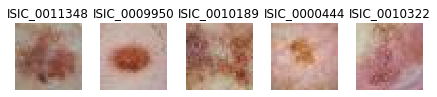

In [8]:
import imageio as io
malignantdata=training[training["label"]=="malignant"]

for index, name in enumerate(malignantdata.head(5).index):
    toread=name + ".jpg"
    plt.subplot(1,5, index+1)
    im=io.imread(r"C:\Users\Khezia\Documents\GitHub\Clinical_Data_Management_2019\coursework_2\training\{}".format(toread))
    plt.imshow(im)
    plt.title(name)
    plt.axis("off")

    plt.tight_layout(pad=0.5)

#### 1.3 From the training image set, load five benign cases and display their images. (10 points)

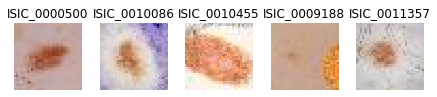

In [9]:
import imageio as io
benigndata=training[training["label"]=="benign"]

for index, name in enumerate(benigndata.head(5).index):
    toread=name + ".jpg"
    plt.subplot(1,5, index+1)
    im=io.imread(r"C:\Users\Khezia\Documents\GitHub\Clinical_Data_Management_2019\coursework_2\training\{}".format(toread))
    plt.imshow(im)
    plt.title(name)
    plt.axis("off")

    plt.tight_layout(pad=0.5)

#### 1.4 Pick one image and show the three channels (R-G-B) of the image separately. (10 points)

Hint: An RGB image is an array of size X x Y x C, where C = 3, standing for respectively red, green and blue channels. You can use `Reds_r`, `Greens_r`, `Blues_r` as the cmap (colormap) for each channel when you plot the images.

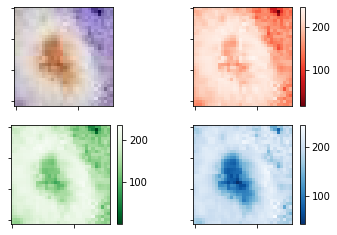

In [10]:
img = io.imread(r'C:\Users\Khezia\Documents\GitHub\Clinical_Data_Management_2019\coursework_2\training\ISIC_0010086.jpg')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

fig, axs = plt.subplots(2,2)

c = axs[0,0].imshow(img)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

c1 = axs[0,1].imshow(red, cmap='Reds_r')
fig.colorbar(c1, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

c2 = axs[1,0].imshow(green, cmap='Greens_r')
fig.colorbar(c2, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

c3 = axs[1,1].imshow(blue, cmap='Blues_r')
fig.colorbar(c3, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()


#### 1.5 Show the intensity histogram of the image. (5 points)

Hint: Flatten the image to a vector, then use the appropriate histogram function in Python.

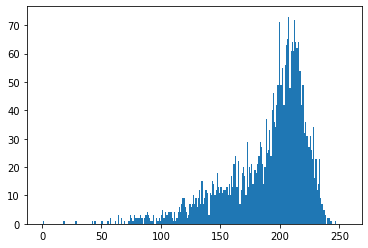

In [11]:
plt.hist(img.ravel(), 256, [0,256])
plt.show()

## 2. Analyse data.

Here, you need to train a classification model on the training set, then apply it to the test set. Most [sklearn](https://scikit-learn.org) classifiers require two inputs for training a model, respectively features X and labels y.

X: N x M matrix, N denoting the number of samples, M denoting the number of features for each sample.

y: N x 1 vector, each element recording the label of a sample.

#### 2.1 Prepare the training data according to the above description, using variable names X_train and y_train. Print out the shapes, i.e. dimensions, of X_train and y_train. (10 points)

In [59]:
im_array=[]

for index, name in enumerate(training.index):
    toread=name + ".jpg"
    im=io.imread(r"C:\Users\Khezia\Documents\GitHub\Clinical_Data_Management_2019\coursework_2\training\{}".format(toread))
    
    im_array.append(im)
    #print(x, y, z)
    
    #im_array.append(together)
im_array = np.stack(im_array)   
img_num,row,col,colour=im_array.shape
im_array=np.reshape(im_array,(img_num,row*col*colour))
im_array.shape

X_train=im_array

y_train=training
y_train=np.ravel(y_train)
y_train.shape

(600,)

In [55]:
print(im.shape)

(32, 32, 3)


#### 2.2 Similarly, prepare the test data according, using variable names X_test and y_test. Print out the shapes of X_test and y_test. (10 points)

In [60]:
tartest = tarfile.open("test.tar.gz")
tartest.extractall()
tartest.close()

im_array=[]

for index, name in enumerate(test.index):
    toread=name + ".jpg"
    im=io.imread(r"C:\Users\Khezia\Documents\GitHub\Clinical_Data_Management_2019\coursework_2\test\{}".format(toread))
    
    im_array.append(im)
    #print(x, y, z)
    
    #im_array.append(together)
im_array = np.stack(im_array)   
img_num,row,col,colour=im_array.shape
im_array=np.reshape(im_array,(img_num,row*col*colour))
im_array.shape

X_test=im_array
X_test.shape

y_test=test
y_test=np.ravel(y_test)
y_test.shape

(300,)

#### 2.3 Train a classification model on X_train and y_train. (10 points)

Hint: You only need to train one model. You can use any classification model supported by sklearn, including

* [K nearest neighbour classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Random forest classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Support vector machine classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* or any other models

In [61]:
K=1 #comparing one number against 1
model=neighbors.KNeighborsClassifier(K)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### 2.4 Apply the model on the test set X_test to predict the labels. (5 points)

In [63]:
y_pred=model.predict(X_test)


#### 2.5 Display the [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) of the prediction results. (5 points)

Hint: You can find an [implementation](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) in sklearn.

[[212  26]
 [ 49  13]]


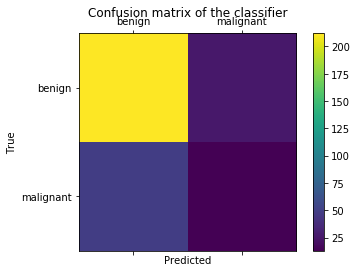

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, )
print(cm)

labels = ['benign', 'malignant']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### 2.6 Explain how many malignant cases there are in the test set and how many are correctly predicted. (10 points)

#### Survey: How long does it take you to complete this coursework?

In [ ]:
Print("It took around 12 hours")